In [12]:
from __future__ import print_function, division

# 1. Visualisation with  `matplotlib`
________
The library `matplotlib` is an extremely versatile graphics library written for Python in order to replicate and produce MATLAB type visualisations for engineering and scientific research. It is a low-level library and uses Python as the grammar for its graphics creation. 

In this section of the course, we will learn about the `Figure` and `Axes` objects. These represent the backbone of `matplotlib` and all other objects are created on these two objects. We will learn how to generate the simplest chart - the "bread and butter" of scientific visualisation - line plots and scatter plots. 

Then we will cover distributional plots in one and two dimensions. Density based plots are especially important when the number of data points are huge and overplotting becomes a problem. 

Next we will learn how to create subplots, annotations and customizing your plot. 

The ultimate learning objective of this course though is to actually put into practise some basic principles of data visualizations and how to choose the most appropriate visualization for the intended purpose. 

## 1.1 Learning objectives

In this section we will: 

   * Importing the `matplotlib` library and the `%matplotlib inline` magic command. 
   * How to set up `Figure` and `Axes` objects. 
   * Using the `.plot` method and its various keyword arguments. 
   * Adding plot titles at the `axis` and `figure` level. 
   
## 1.2 Win, lose or DRAW! 

By default, Jupyter Notebooks do not display `matplotlib` objects straight after they are created. In order to activate the auto display function, we have to instruct Jupyter to do so by using the Ipython magic commands. In the cell below, run the command `%matplotlib inline`. 


In [1]:
%matplotlib inline

Now we need to import the `matplotlib` plotting library. We use the `import` and `as` keyword to do this. The keyword `as` allows to replace the lengthy module name with an alias of our choosing. By convention, use `plt`. 

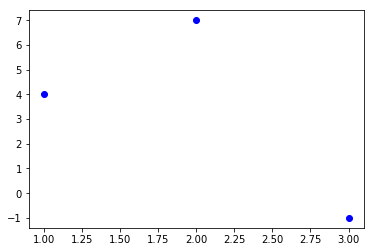

In [2]:
import matplotlib.pyplot as plt

plt.plot([1,2,3], [4,7, -1], 'bo')

Here above, you will see our very first plot using the `plt.plot` function: A simple scatter plot consisting of coordinates $$(1,4), (2,7), (3, -1)$$ on the $x$-$y$ plane. Notice the arguments passed to `plt.plot`. 

  * A `list` of the $x$-coordinates, `[1,2,3]`. In general purpose usage, this is a `Series` or an `array` object containing the predictor variables of our data. 
  
  * A `list` of the $y$-coordinates, `[4,7,-1]`. This will usually be the response variable. 
  
  * The final string `bo` is a convenience syntax for instructing `plt.plot` to create a scatterplot using round (`o`) markers coloured blue (`b`). 
  
Note that if not marker string is passed to `.plot`, `matplotlib` will output a line plot by default. 

All this is very nice, but before we go into more details about `plt.plot`, we must set up the general framework and workflow of working with this library. 

## 1.3 The canvas: `figure` and `axes`

The parent object of any `matplotlib` visualisation is the `Figure` class. Figures hold the `Axes` objects which in turn holds all the other components that make up a plot: The `artist` objects like lines, patches, dots, text, arrows, contours and the like. Even objects like legends, colorbars, axis labels, ticks and plot titles are all subclassed from either a figure object or an axes object. Note that all visualisations produced by `matplotlib` are always contained in a Figure and axes. If these are not explicitly instanced, that they are implicitly created when `plt.plot` is called. 

The `matplotlib` API can be interacted with using MATLAB style interfacing which uses function calls to `plt.plot` and various other annotation functions. 

However, in this course, we wish to emphasize the object oriented interface to the API. This makes it easier  to customize `matplotlib` and even  `seaborn` visualisations. Essentially plot customization is about tweaking the *attributes* of an object. 

To create a `figure` object:

In [16]:
fig1 = plt.figure()

When run, we see that an instance of a Figure class has been created. However, we do not see anything more that that printed output. In fact, if we were using another Python IDE like Spyder or accessing Python from the command prompt (like IPython), we will see a blank pop window created. Since we are using Jupyter Notebooks, our particular graphical renderer (`inline`) will not display this. 

From this point on, we can create the plots with desire using `plt.plot` and assign the output to a variable name. Copy the line in the cell above and paste it below. 

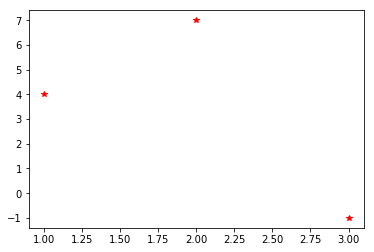

In [20]:
fig1 = plt.figure() # This line will be pasted in by course attendee. delete on deployment
ax1 = plt.plot([1,2,3], [4,7,-1], '*r') 

The reason for putting both figure instance and the axes instance calls in the same cell is so that axes `ax1` will be contained in `fig1`. It's not that we can't plot without doing this, but by doing this we can save the figure to a file by running the following command 

    fig1.savefig("my_first_plot.jpeg", dpi=300) 

in possibly another cell. Since this figure contains that `ax1` object, the saved jpeg file will contain the plot above. If we do not instance a figure, it is quite difficult (though not impossible) to save our plot. Note that if the `plot` and `figure` instance were executed in *different* cells, when `fig1.savefig` is called, your jpeg file will be empty!

You may want to rerender your plot to adjust some parameters. By putting the `.savefig` method in another cell, you create a jpeg file output *only once* after you are satisfied with what you see (in Jupyter Notebook). 

In [22]:
fig1.savefig("my_first_plot.jpeg", dpi=300)

Check your current working directory. You should see the jpeg file there now. 

Congratulations! You have completed your first visualisation project! 

# 2. Basic plotting with `.plot` method
________
The basic workflow of creating a visualisation consists on instancing a figure and axes class, getting data and plotting it and finally saving your output to a file. In this section, we will learn about `matplotlib`'s versatile `.plot` method to create basic scatter and line plots. 

The function of the `.plot` method is to create scatter and line plots as have been mentioned. You have seen how to create basic scatter plots, so lets work through a simple visualisation project using line plots. Along the way, we will learn about the various customization and keyword arguments to the `.plot` method. 


In [43]:
import pandas as pd
import pandas_datareader.data as web # requires pandas-datareader package
from datetime import datetime


start = datetime(2016,11,9)
# end = datetime(2017, 7, 24)
tickers = ["AAPL", "MMM", "GOOGL"]
stock_panel = web.DataReader(tickers, "google", start, )

closing_pct_change = (stock_panel.loc["Close", :, :]
                                 .pct_change()) 

closing_pct_change.to_csv("closing_pct_change.csv")

In [ ]:
# backup plan

closing_pct_change = pd.read_csv("closing_pct_change.csv")

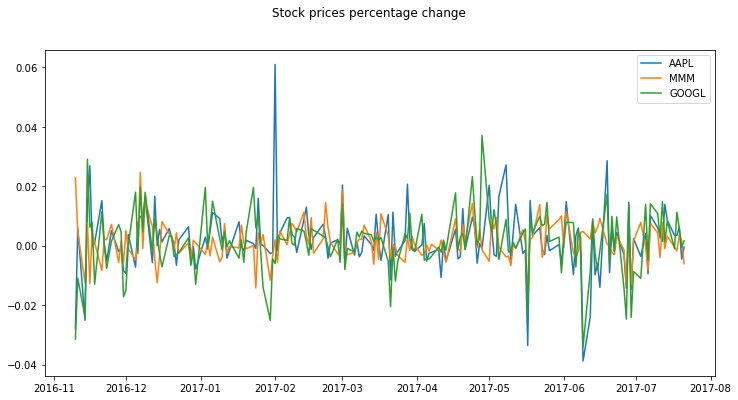

In [44]:
fig2, ax2 = plt.subplots(figsize=(12,6)) # figure size is given in (wide, height) units

for ticker in tickers:
    ax2.plot(closing_pct_change[ticker], label=ticker)

plt.legend(loc="best")
fig2.suptitle("Stock prices percentage change")

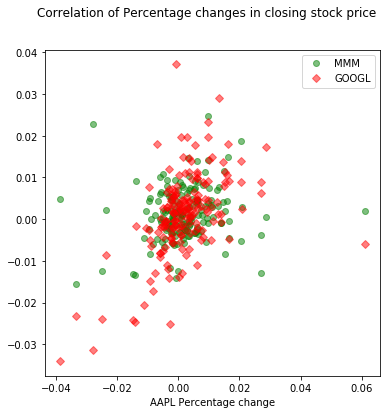

In [47]:
fig3, ax3 = plt.subplots(figsize=(6,6))

marker = ["go", "rD"]
for mark, ticker in zip(marker, tickers[1:]):
    ax3.plot(closing_pct_change["AAPL"], closing_pct_change[ticker], mark, label=ticker, alpha=0.5)
    ax3.set_xlabel("AAPL Percentage change")
plt.legend(loc="best")
fig3.suptitle("Correlation of Percentage changes in closing stock price")

In [8]:
import pandas_datareader.data as web
from datetime import datetime




In [9]:
oecd_currency = web.DataReader("MEI_FIN", "oecd", end=datetime(2017,7,24))

oecd_currency.head()

Subject   Share Prices, Index                                                 \
Country             Australia                      Austria                     
Frequency              Annual Quarterly Monthly     Annual Quarterly Monthly   
Time                                                                           
1958                 3.094338       NaN     NaN   4.814914       NaN     NaN   
1959                 3.856513       NaN     NaN   6.350099       NaN     NaN   
1960                 4.697565       NaN     NaN   8.663807       NaN     NaN   
1961                 4.327078       NaN     NaN  13.889660       NaN     NaN   
1962                 4.355825       NaN     NaN  14.451410       NaN     NaN   

Subject                                         ...    \
Country   Belgium                      Canada   ...     
Frequency  Annual Quarterly Monthly    Annual   ...     
Time                                            ...     
1958          NaN       NaN     NaN  4.025722   ...     
1959          NaN       NaN     NaN  4.651903   ...     
1960          NaN       NaN     NaN  4.263052   ...     
1961          NaN       NaN     NaN  5.250463   ...     
1962          NaN       NaN     NaN  5.226418   ...     

Subject   Immediate interest rates, Call Money, Interbank Rate, Per cent per annum  \
Country                                                                     Latvia   
Frequency                                                                  Monthly   
Time                                                                                 
1958                                                     NaN                         
1959                                                     NaN                         
1960                                                     NaN                         
1961                                                     NaN                         
1962                                                     NaN                         

Subject                                                                    \
Country   Euro area (19 countries)                   Costa Rica             
Frequency                   Annual Quarterly Monthly     Annual Quarterly   
Time                                                                        
1958                           NaN       NaN     NaN        NaN       NaN   
1959                           NaN       NaN     NaN        NaN       NaN   
1960                           NaN       NaN     NaN        NaN       NaN   
1961                           NaN       NaN     NaN        NaN       NaN   
1962                           NaN       NaN     NaN        NaN       NaN   

Subject                                        
Country           Lithuania                    
Frequency Monthly    Annual Quarterly Monthly  
Time                                           
1958          NaN       NaN       NaN     NaN  
1959          NaN       NaN       NaN     NaN  
1960          NaN       NaN       NaN     NaN  
1961          NaN       NaN       NaN     NaN  
1962          NaN       NaN       NaN     NaN  

[5 rows x 1296 columns]

In [10]:
oecd_currency.columns

MultiIndex(levels=[['Broad Money (M3) Index, SA', 'Currency exchange rates, monthly average', 'Immediate interest rates, Call Money, Interbank Rate, Per cent per annum', 'Long-term interest rates, Per cent per annum', 'Narrow Money (M1) Index, SA', 'Relative consumer price indices', 'Relative unit labour costs', 'Share Prices, Index', 'Short-term interest rates, Per cent per annum'], ['Australia', 'Austria', 'Belgium', 'Brazil', 'Canada', 'Chile', 'China (People's Republic of)', 'Colombia', 'Costa Rica', 'Czech Republic', 'Denmark', 'Estonia', 'Euro area (19 countries)', 'Finland', 'France', 'Germany', 'Greece', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Ireland', 'Israel', 'Italy', 'Japan', 'Korea', 'Latvia', 'Lithuania', 'Luxembourg', 'Mexico', 'Netherlands', 'New Zealand', 'Norway', 'OECD - Europe', 'OECD - Total', 'Poland', 'Portugal', 'Russia', 'SDR', 'Slovak Republic', 'Slovenia', 'South Africa', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'United Kingdom', 'United States'], ['

In [52]:
import pandas as pd
import numpy as np

In [12]:
idx = pd.IndexSlice

In [36]:
monthly = oecd_currency.index.to_series().loc[lambda x: x.map(lambda y: len(y)==8)]

In [56]:
oecd_currency_xchange = (oecd_currency.sort_index(axis=1, ascending=True)
                                      .loc[:, idx["Currency exchange rates, monthly average",:,"Monthly"]]
                                      .loc[monthly, :]
                                      .dropna(axis=0,how="all")
                                      .dropna(axis=1, how="any")
                                      .reset_index("Time")
                                      .sort_index(axis=1, ascending=True)
                                      .assign(convertTime=lambda df: pd.to_datetime(df.Time))
                                      .set_index("convertTime")
                                      .drop("Time", axis=1)
                                      .apply(np.log10))
                                                   
oecd_currency_xchange.head()

Subject     Currency exchange rates, monthly average                       \
Country                                    Australia     Brazil    Canada   
Frequency                                    Monthly    Monthly   Monthly   
convertTime                                                                 
1958-01-01                                 -0.049528 -13.381489 -0.006564   
1958-02-01                                 -0.049915 -13.363759 -0.008331   
1958-03-01                                 -0.049877 -13.334376 -0.010105   
1958-04-01                                 -0.050148 -13.284578 -0.012781   
1958-05-01                                 -0.049915 -13.243185 -0.014574   

Subject                                                                  \
Country         Chile China (People's Republic of)  Colombia Costa Rica   
Frequency     Monthly                      Monthly   Monthly    Monthly   
convertTime                                                               
1958-01-01  -3.206222                     0.391255  0.748963    0.74935   
1958-02-01  -3.206222                     0.391255  0.778874    0.74935   
1958-03-01  -3.206921                     0.391255  0.786041    0.74935   
1958-04-01  -3.160535                     0.391255  0.822168    0.74935   
1958-05-01  -3.160535                     0.391255  0.830589    0.74935   

Subject                                                                    \
Country       Denmark   Iceland     India    Israel     Japan New Zealand   
Frequency     Monthly   Monthly   Monthly   Monthly   Monthly     Monthly   
convertTime                                                                 
1958-01-01   0.839171 -0.788266  0.677789 -3.744727  2.556107   -0.143858   
1958-02-01   0.839171 -0.788266  0.677333 -3.744727  2.556107   -0.144232   
1958-03-01   0.839171 -0.788266  0.677242 -3.744727  2.556107   -0.144200   
1958-04-01   0.839171 -0.788266  0.676785 -3.744727  2.556107   -0.144450   
1958-05-01   0.839171 -0.788266  0.676785 -3.744727  2.556107   -0.144232   

Subject                                                                     \
Country        Norway     SDR South Africa    Sweden Switzerland    Turkey   
Frequency     Monthly Monthly      Monthly   Monthly     Monthly   Monthly   
convertTime                                                                  
1958-01-01   0.853624     0.0    -0.147557  0.713813    0.632012 -5.471083   
1958-02-01   0.853624     0.0    -0.148030  0.713813    0.631991 -5.471083   
1958-03-01   0.853624     0.0    -0.147944  0.713813    0.631991 -5.471083   
1958-04-01   0.853624     0.0    -0.148197  0.713813    0.631991 -5.471083   
1958-05-01   0.853624     0.0    -0.147993  0.713813    0.631991 -5.471083   

Subject                     
Country     United Kingdom  
Frequency          Monthly  
convertTime                 
1958-01-01       -0.449139  
1958-02-01       -0.449802  
1958-03-01       -0.449525  
1958-04-01       -0.449771  
1958-05-01       -0.449571

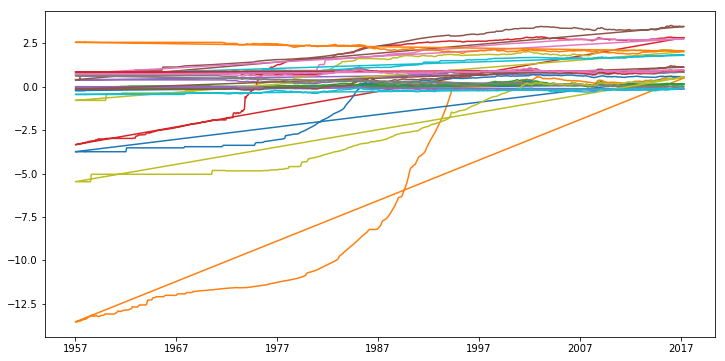

In [62]:
fig4, ax4 = plt.subplots(figsize=(12,6))

for _ in range(oecd_currency_xchange.shape[1]):
    ax4.plot(oecd_currency_xchange.iloc[:,_])

In [49]:
oecd_currency_xchange.isnull().sum(axis=0)

Subject                                   Country                       Frequency
Time                                                                                 0
Currency exchange rates, monthly average  Australia                     Monthly      0
                                          Brazil                        Monthly      0
                                          Canada                        Monthly      0
                                          Chile                         Monthly      0
                                          China (People's Republic of)  Monthly      0
                                          Colombia                      Monthly      0
                                          Costa Rica                    Monthly      0
                                          Denmark                       Monthly      0
                                          Iceland                       Monthly      0
                                          India 

In [50]:
oecd_currency_xchange.shape

(725, 21)